In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import thinkstats2
import thinkplot
import matplotlib as plt

In [174]:
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [175]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


AGE

In [176]:
age = pd.Series(df["Age"])
age.describe()

count    15992.000000
mean        33.225238
std         11.045216
min         16.000000
25%         24.000000
50%         31.000000
75%         42.000000
max         55.000000
Name: Age, dtype: float64

In [177]:
#Make and plot a Hist and Pmf for age.
hist = thinkstats2.Hist(age)
pmf = thinkstats2.Pmf(age)

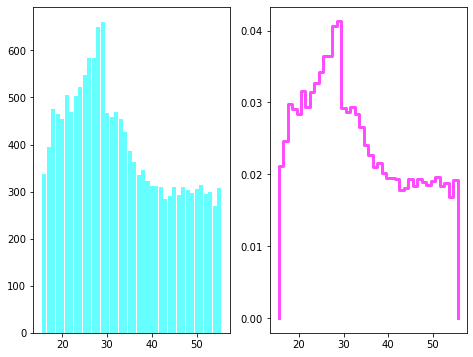

In [178]:
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(hist, color="cyan")
thinkplot.SubPlot(2)
thinkplot.Pmf(pmf, color="magenta")
thinkplot.Config()

In [179]:
#What fraction of the people in the data are 51? 
fiftyone= pmf.Prob(51)
fiftyone

0.01963481740870435

In [180]:
#What fraction are older than 51?
df_over51 = df[df["Age"] > 51]
len(df_over51)/len(age)

0.07322411205602801

In [181]:
#What is the median age?
age.median() 


31.0

#Does the distribution of the sample data seem to mirror the working age population?
No I would say this does not mirror the working age population as lots of boomers are working into their 
70s now. I dont know where you could even find a workplace where the oldest person is 55. 
Maybe a dispensary or something. But no this is definitely a lot younger than the current working population.


DEMOGRAPHICS

In [182]:
df.columns

Index(['Age', 'Eduacation', 'Race', 'Hisp', 'MaritalStatus', 'Nodeg',
       'Earnings_1974', 'Earnings_1975', 'Earnings_1978'],
      dtype='object')

In [183]:
hs = df[df["Eduacation"] != "LessThanHighSchool"]
df["Eduacation"].value_counts()

HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64

In [184]:
hs["Eduacation"].value_counts()

HighSchool      6252
Intermediate    2708
graduate        1367
PostGraduate     934
Name: Eduacation, dtype: int64

In [185]:
postsec["Eduacation"].value_counts()

HighSchool      6252
Intermediate    2708
graduate        1367
PostGraduate     934
Name: Eduacation, dtype: int64

In [200]:
not_hisp = df[df["Hisp"] == "NotHispanic"]
hisp = df[df["Hisp"] == "hispanic"]
df["Hisp"].value_counts()

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64

In [201]:
not_black = df[df["Race"] == "NotBlack"]
black = df[df["Race"]== "black"]
df["Race"].value_counts()

NotBlack    14816
black        1176
Name: Race, dtype: int64

In [188]:
single = df[df["MaritalStatus"] == "NotMarried"]
married = df[df["MaritalStatus"] == "Married"]
df["MaritalStatus"].value_counts()

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64

In [202]:
degree = df[df["Nodeg"] == False]
no_degree = df[df["Nodeg"] == True]
df["Nodeg"].value_counts()

0    11261
1     4731
Name: Nodeg, dtype: int64

In [203]:
#%s of people 
print("% that are Black:", len(black)/len(df))
print("% that are Hispanic:", len(hisp)/len(df))
print("% that are married:", len(married)/len(df))
print("% that are have at least finished high school:", len(hs)/len(df))
print("% that they do not have a demographic for:", len(no_degree)/len(df))



% that are Black: 0.0735367683841921
% that are Hispanic: 0.0720360180090045
% that are married: 0.7117308654327164
% that are have at least finished high school: 0.7041645822911455
% that they do not have a demographic for: 0.2958354177088544


https://www.census.gov/quickfacts/fact/table/US/RHI725219
According the the US census in 2019, the black population is 13.4% and hispanic is 18.5%. So the dataset isn't very representative in that matter. They could stand to do some diversity hiring. 
For education it says 88% of Americans have at least a high school education but in the dataset it is only 70%. So their workforce has less schooling than is representative of the US population.
https://www.statista.com/statistics/242030/marital-status-of-the-us-population-by-sex/
About 69% of the US population is married as of 2020. The data is representative of that and only off by about 2%. 
The people with no demographic can also be affecting things. 30% of the people that work there have no demographic information. If a large chunk were Hispanic then that could bring up their hispanic % to more like the current US population. If they are white then that makes 68% of the dataset is white. 60% of the US is white alone. 

EARNINGS

In [191]:
hist74 = thinkstats2.Hist("Earnings_1974")
hist75 = thinkstats2.Hist("Earnings_1975")
hist78 = thinkstats2.Hist("Earnings_1978")

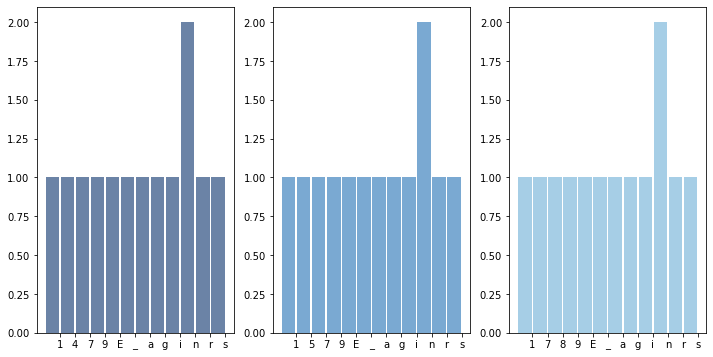

In [192]:
thinkplot.PrePlot(3, cols=3)
thinkplot.Hist(hist74)
thinkplot.SubPlot(2)
thinkplot.Hist(hist75)
thinkplot.SubPlot(3)
thinkplot.Hist(hist78)
thinkplot.Config()

C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Earnings_1978', ylabel='Density'>

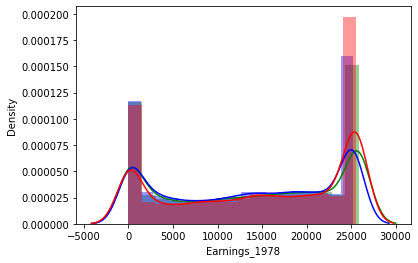

In [193]:
#plot 3 earnings
sns.distplot(df["Earnings_1974"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"}, color="green")
sns.distplot(df["Earnings_1975"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"}, color="blue")
sns.distplot(df["Earnings_1978"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"}, color="red")

In [194]:
df["Earnings_1974"].value_counts().tail()
df["Earnings_1974"].describe()

count    15992.000000
mean     14016.800304
std       9569.795893
min          0.000000
25%       4403.452250
50%      15123.580000
75%      23584.180000
max      25862.320000
Name: Earnings_1974, dtype: float64

In [195]:
df["Earnings_1978"].value_counts().sort_values(ascending=True)

923.5791         1
19495.6500       1
12771.9900       1
642.8111         1
4920.8290        1
              ... 
11526.2700       8
23052.5300      10
2365.8400       25
0.0000        2172
25564.6700    4145
Name: Earnings_1978, Length: 7243, dtype: int64

	What is one conclusion could you draw from visualizing of the earnings in the different year? 
The distribution is the same over the years. There are lots of people that are making $0 and there are lots of people making $25,000. They've got around making $0 and 3052, people making just over 3000 making $25,000. It's odd because its like there is a quota that they need a specific number of people to make a specific amount. Unless they just have around 20 people in each role for the middle salaries. There are lots of people that are making $0 and there are lots of people making $25,000. They might have had 2000 unpaid interns. 

In [218]:
print("Black:", thinkstats2.CohenEffectSize(black["Earnings_1978"], not_black["Earnings_1978"]))
print("Hisp: ", thinkstats2.CohenEffectSize(hisp["Earnings_1978"], not_hisp["Earnings_1978"]))
print("Married: ", thinkstats2.CohenEffectSize(married["Earnings_1978"], single["Earnings_1978"]))
print("Degree: ", thinkstats2.CohenEffectSize(degree["Earnings_1978"], no_degree["Earnings_1978"]))

Black: -0.31883255859070525
Hisp:  -0.16210284395555566
Married:  0.5737396692403472
Degree:  0.3367928897615812


o	Which has the greatest effect size on 1978 earnings?
Marital Status has the biggest effect on 1978 earnings. These people are also have the youngest mean. They probably would not have a family to support so they wouldn't have to make as much. They also could just be working part time. You can look a at the means and medians of each category to dig deeper, as I did below.

In [221]:
#Looking at Means
print("Black Mean: ", black.mean())
print("Hispanic Mean: ", hisp.mean())
print("Single Mean: ", single.mean())
print("High School Education Mean: ", df[df["Eduacation"] == "HighSchool"].mean())
print("Have a Degree: ", degree.mean())

Black Mean:  Age                 32.664116
Nodeg                0.433673
Earnings_1974    11426.576987
Earnings_1975    10941.064806
Earnings_1978    12006.682951
dtype: float64
Hispanic Mean:  Age                 33.065104
Nodeg                0.535590
Earnings_1974    12401.663826
Earnings_1975    12289.613541
Earnings_1978    13396.677888
dtype: float64
Single Mean:  Age                22.0000
Nodeg               0.0000
Earnings_1974    4325.0815
Earnings_1975    4950.2420
Earnings_1978    9982.0430
dtype: float64
High School Education Mean:  Age                 33.349808
Nodeg                0.000000
Earnings_1974    15293.506030
Earnings_1975    14715.210287
Earnings_1978    15548.593561
dtype: float64
Have a Degree:  Age                 32.850280
Nodeg                0.000000
Earnings_1974    15032.593755
Earnings_1975    14710.629182
Earnings_1978    15796.747484
dtype: float64


In [222]:
#Looking at medians
print("Black Mean: ", black.median())
print("Hispanic Mean: ", hisp.median())
print("Single Mean: ", single.median())
print("High School Education Mean: ", df[df["Eduacation"] == "HighSchool"].median())
print("Have a Degree: ", degree.median())

Black Mean:  Age                 31.000
Nodeg                0.000
Earnings_1974    11079.650
Earnings_1975    10845.775
Earnings_1978    12115.880
dtype: float64
Hispanic Mean:  Age                 32.000
Nodeg                1.000
Earnings_1974    12668.615
Earnings_1975    12378.290
Earnings_1978    13717.740
dtype: float64
Single Mean:  Age                22.0000
Nodeg               0.0000
Earnings_1974    4325.0815
Earnings_1975    4950.2420
Earnings_1978    9982.0430
dtype: float64
High School Education Mean:  Age                 32.000
Nodeg                0.000
Earnings_1974    16902.590
Earnings_1975    15991.160
Earnings_1978    17840.595
dtype: float64
Have a Degree:  Age                 31.00
Nodeg                0.00
Earnings_1974    16741.93
Earnings_1975    16410.10
Earnings_1978    18693.24
dtype: float64


C:\Users\allyr\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


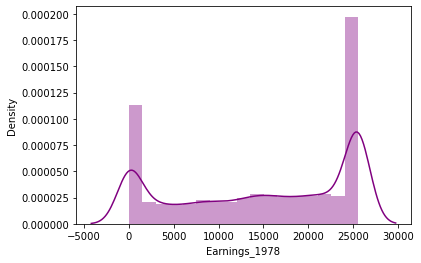

In [226]:
#Make a histogram and PMF
sns.distplot(df["Earnings_1978"], kde_kws={"label":"Value"}, hist_kws={"label":"Value"}, color="purple")
pmf = thinkstats2.Pmf("Earnings_1978")

In [239]:
pmf78 = thinkstats2.Pmf("Earnings_1978")
thinkplot.Pmf(pmf78)

c:\Users\allyr\OneDrive\Documents\DATA 3450 - Stats\Assignment 1\thinkplot\thinkplot.py:465: UserWarning: Pmf: Can't compute bar width automatically.Check for non-numeric types in Pmf.Or try providing width option.
  warnings.warn("Pmf: Can't compute bar width automatically."


TypeError: unsupported operand type(s) for -: 'str' and 'float'